In [1]:
# import libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
# Sample dataset
dataset = [['Milk', 'Bread', 'Butter'],
           ['Bread', 'Butter', 'Eggs'],
           ['Milk', 'Bread', 'Eggs'],
           ['Milk', 'Eggs'],
           ['Bread', 'Butter']]

# Convert the dataset into a DataFrame
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the DataFrame
df

,Bread,Butter,Eggs,Milk
0,True,True,False,True
1,True,True,True,False
2,True,False,True,True
3,False,False,True,True
4,True,True,False,False


In [3]:
# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Display frequent itemsets
frequent_itemsets

,support,itemsets
0,0.8,(Bread)
1,0.6,(Butter)
2,0.6,(Eggs)
3,0.6,(Milk)
4,0.6,"(Bread, Butter)"


In [4]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Butter),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0
1,(Butter),(Bread),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5


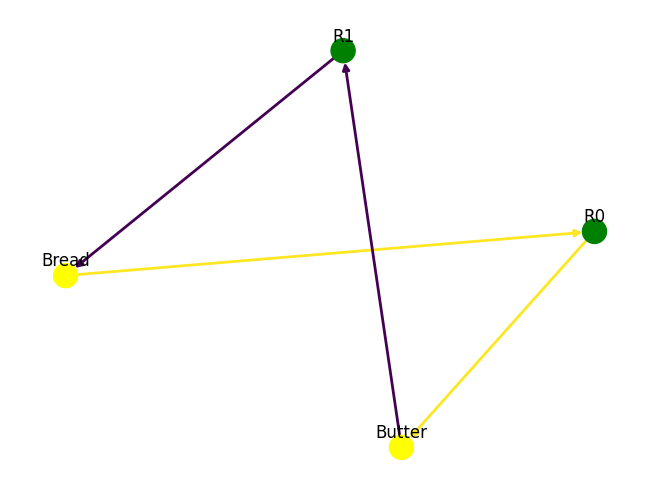

In [5]:
def draw_graph(rules, rules_to_show):
    G = nx.DiGraph()
    
    color_map = []
    N = 50
    colors = np.random.rand(N)
    
    # Ensure that rules_to_show does not exceed the number of rules
    rules_to_show = min(rules_to_show, len(rules))
    
    # Loop through the first 'rules_to_show' rules
    for i in range(rules_to_show):
        G.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G.add_nodes_from([a])
            G.add_edge(a, "R"+str(i), color=colors[i], weight=2)
        for c in rules.iloc[i]['consequents']:
            G.add_nodes_from([c])
            G.add_edge("R"+str(i), c, color=colors[i], weight=2)
    
    for node in G:
        if node.startswith("R"):
            color_map.append('green')
        else:
            color_map.append('yellow')

    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G, k=16, scale=1)
    nx.draw(G, pos, node_color=color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G, pos)
    plt.show()

# Visualize the first 5 rules
draw_graph(rules, 5)
